In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rahmasleam/intel-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/intel-image-dataset


In [ ]:
import os

def count_folders_and_images(dataset_path):
    total_folders = 0
    total_images = 0
    for root, dirs, files in os.walk(dataset_path):
        total_folders += len(dirs)  # Count all directories
        total_images += len([file for file in files if file.lower().endswith(('jpg', 'jpeg', 'png', 'bmp', 'gif'))])

    return total_folders, total_images


In [ ]:

# Replace `path` with the actual path to your downloaded dataset folder
dataset_path = "/kaggle/input/intel-image-dataset/Intel Image Dataset"
num_folders, num_images = count_folders_and_images(dataset_path)

print(f"Number of folders (including subfolders): {num_folders}")
print(f"Number of images: {num_images}")


Number of folders (including subfolders): 6
Number of images: 3000


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
data_dir =  r"C:\Users\vsvik\.cache\kagglehub\datasets\rahmasleam\intel-image-dataset\versions\1"
output_dir = 'split_dataset'
train_ratio = 0.8

# Create output directories for train and test
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'test')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Iterate over each category (subfolder) in the dataset
categories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

for category in categories:
    category_path = os.path.join(data_dir, category)
    images = os.listdir(category_path)

    # Split the dataset into train and test
    train_images, test_images = train_test_split(images, train_size=train_ratio, random_state=42)

    # Create category subfolders in train and test directories
    train_category_dir = os.path.join(train_dir, category)
    test_category_dir = os.path.join(test_dir, category)
    os.makedirs(train_category_dir, exist_ok=True)
    os.makedirs(test_category_dir, exist_ok=True)

    # Move images to respective directories
    for image in train_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(train_category_dir, image))

    for image in test_images:
        shutil.copy(os.path.join(category_path, image), os.path.join(test_category_dir, image))

print(f"Dataset split complete!\nTrain directory: {train_dir}\nTest directory: {test_dir}")


Dataset split complete!
Train directory: split_dataset/train
Test directory: split_dataset/test


Random Train Images:
Showing random images from category: mountain


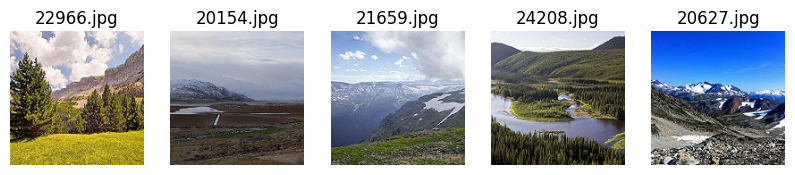

Random Test Images:
Showing random images from category: buildings


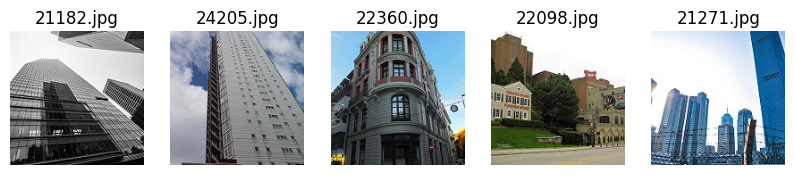

In [ ]:
import os
import random
from matplotlib import pyplot as plt
from PIL import Image

directory =  r"C:\Users\vsvik\.cache\kagglehub\datasets\rahmasleam\intel-image-dataset\versions\1"

def show_random_images(directory, num_images=5):
  # Get all category subfolders
    categories = [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]
    if not categories:
        print(f"No categories found in {directory}")
        return

    # Select random category and images
    category = random.choice(categories)
    category_path = os.path.join(directory, category)
    images = os.listdir(category_path)
    if not images:
        print(f"No images found in category {category} of {directory}")
        return

    random_images = random.sample(images, min(len(images), num_images))

    # Display images
    print(f"Showing random images from category: {category}")
    plt.figure(figsize=(10, 5))
    for i, image_name in enumerate(random_images, start=1):
        image_path = os.path.join(category_path, image_name)
        image = Image.open(image_path)
        plt.subplot(1, len(random_images), i)
        plt.imshow(image)
        plt.axis('off')
        plt.title(image_name)
    plt.show()

# Display random images from train and test directories
print("Random Train Images:")
show_random_images('split_dataset/train')

print("Random Test Images:")
show_random_images('split_dataset/test')


In [ ]:
import sys
from matplotlib import pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, f1_score, roc_curve, auc
import seaborn as sns

In [ ]:
from tensorflow.keras.applications import VGG16
# Define the model using VGG16
def define_model(num_classes):
    # Load the pre-trained VGG16 model without the top classifier layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the convolutional base
    for layer in base_model.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(base_model)

    # Add custom classification head
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
num_classes = 6
model = define_model(num_classes)

# Summary of the model
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
def plot_curves(history):
    # Plot Accuracy Curves
    plt.figure(figsize=(12, 4))

    # Training vs Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Training vs Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_pr_curve(y_true, y_probs, num_classes):
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_probs[:, i])
        plt.plot(recall, precision, label=f'Class {i}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def plot_curves(history):
    # Plot Accuracy Curves
    plt.figure(figsize=(12, 4))

    # Training vs Validation Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Training vs Validation Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curves')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:

def plot_pr_curve(y_true, y_probs, num_classes):
    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_probs[:, i])
        plt.plot(recall, precision, label=f'Class {i}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid()
    plt.show()


In [ ]:

def plot_confusion_matrix(cm, class_names):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [ ]:
def run_test_harness():
    # Prepare data generators
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # Train and test directories
    train_dir = 'split_dataset/train'
    test_dir = 'split_dataset/test'

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical',  # Multi-class classification
        shuffle=True
    )

    test_it = datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical',
        shuffle=False
    )

    # Define the model
    num_classes = len(train_it.class_indices)  # Number of classes
    model = define_model(num_classes)  # Make sure this function is defined elsewhere

    # Train the model
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=40
    )

    # Plot accuracy and loss curves
    plot_curves(history)

    # Evaluate model on test data
    test_steps = len(test_it)
    y_probs = model.predict(test_it, steps=test_steps, verbose=1)
    y_pred = np.argmax(y_probs, axis=1)
    y_true = test_it.classes

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)

    # Plot Confusion Matrix
    class_names = list(test_it.class_indices.keys())
    plot_confusion_matrix(cm, class_names)

    # Classification Report
    report = classification_report(y_true, y_pred, target_names=class_names)
    print("Classification Report:\n", report)

    # One-hot encode y_true
    y_true_one_hot = np.zeros((len(y_true), num_classes))
    y_true_one_hot[np.arange(len(y_true)), y_true] = 1

    # Precision-Recall Curves
    plot_pr_curve(y_true_one_hot, y_probs, num_classes)

    # Save Confusion Matrix to CSV
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
    cm_df.to_csv('confusion_matrix.csv', index=True)

    # Save classification report
    report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    report_df.to_csv('classification_report.csv', index=True)

    print("Confusion matrix and classification report saved to CSV.")


Found 2398 images belonging to 6 classes.
Found 602 images belonging to 6 classes.
Epoch 1/40


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1734064622.828581     198 service.cc:145] XLA service 0x7ac2a40388c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734064622.828655     198 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734064622.828663     198 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/75 ━━━━━━━━━━━━━━━━━━━━ 19:31 16s/step - accuracy: 0.0000e+00 - loss: 2.1792

I0000 00:00:1734064636.596370     198 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


75/75 ━━━━━━━━━━━━━━━━━━━━ 55s 526ms/step - accuracy: 0.5977 - loss: 1.0711 - val_accuracy: 0.8223 - val_loss: 0.4578
Epoch 2/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - accuracy: 0.8845 - loss: 0.3209 - val_accuracy: 0.8555 - val_loss: 0.4195
Epoch 3/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 13s 175ms/step - accuracy: 0.9380 - loss: 0.2161 - val_accuracy: 0.8571 - val_loss: 0.3887
Epoch 4/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 179ms/step - accuracy: 0.9700 - loss: 0.1427 - val_accuracy: 0.8654 - val_loss: 0.3833
Epoch 5/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 14s 188ms/step - accuracy: 0.9811 - loss: 0.1062 - val_accuracy: 0.8671 - val_loss: 0.3743
Epoch 6/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 196ms/step - accuracy: 0.9881 - loss: 0.0806 - val_accuracy: 0.8621 - val_loss: 0.3848
Epoch 7/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 16s 205ms/step - accuracy: 0.9940 - loss: 0.0612 - val_accuracy: 0.8455 - val_loss: 0.3962
Epoch 8/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 15s 202ms/step - accuracy: 0.9949 - loss: 0.0560 - val_accuracy: 0.852

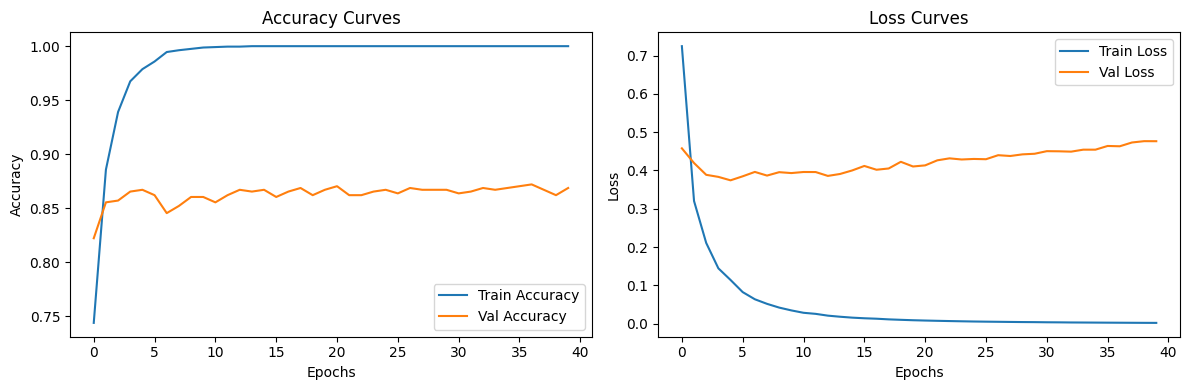

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 172ms/step
Confusion Matrix:
 [[79  1  1  0  0  7]
 [ 0 94  0  1  0  0]
 [ 0  0 94 12  5  0]
 [ 0  0 19 83  3  0]
 [ 3  0  6  7 86  0]
 [11  1  0  1  1 87]]


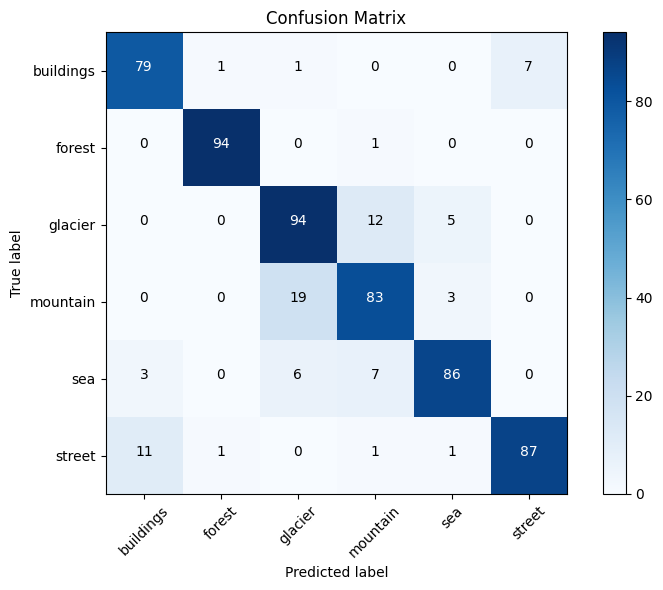

Classification Report:
               precision    recall  f1-score   support

   buildings       0.85      0.90      0.87        88
      forest       0.98      0.99      0.98        95
     glacier       0.78      0.85      0.81       111
    mountain       0.80      0.79      0.79       105
         sea       0.91      0.84      0.87       102
      street       0.93      0.86      0.89       101

    accuracy                           0.87       602
   macro avg       0.87      0.87      0.87       602
weighted avg       0.87      0.87      0.87       602



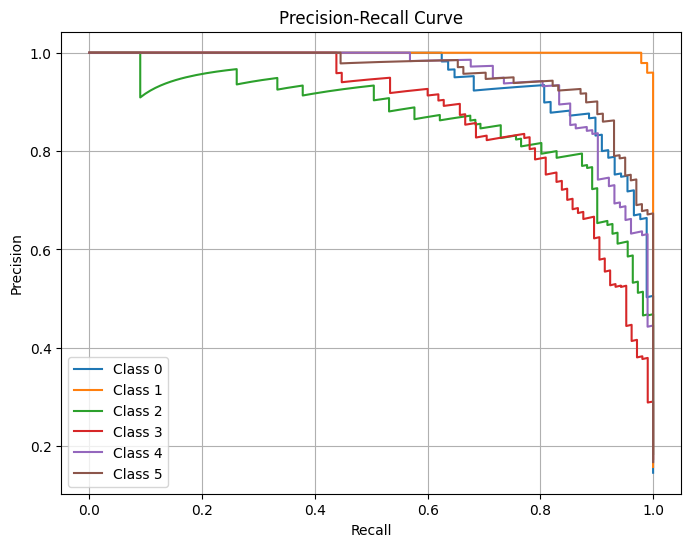

Confusion matrix and classification report saved to CSV.


In [ ]:
run_test_harness()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Define the model using VGG16
def define_model(num_classes):
    # Load the pre-trained VGG16 model without the top classifier layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze the convolutional base initially
    for layer in base_model.layers:
        layer.trainable = False

    # Build the model
    model = Sequential()
    model.add(base_model)

    # Add custom classification head
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def plot_curves(history):
    # Plot accuracy and loss curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='val accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

def plot_confusion_matrix(cm, class_names):
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

def plot_pr_curve(y_true_one_hot, y_probs, num_classes):
    # Plot precision-recall curve
    from sklearn.metrics import precision_recall_curve
    from sklearn.preprocessing import label_binarize
    from sklearn.metrics import average_precision_score

    plt.figure(figsize=(8, 6))
    for i in range(num_classes):
        precision, recall, _ = precision_recall_curve(y_true_one_hot[:, i], y_probs[:, i])
        plt.plot(recall, precision, label=f'Class {i}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()



In [ ]:
def run_test_harness():
    # Prepare data generators
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # Train and test directories
    train_dir = 'split_dataset/train'
    test_dir = 'split_dataset/test'

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical',  # Multi-class classification
        shuffle=True
    )

    test_it = datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical',
        shuffle=False
    )

    # Define the model
    num_classes = len(train_it.class_indices)  # Number of classes
    model = define_model(num_classes)  # Make sure this function is defined elsewhere

    # Get the layers for the VGG16 blocks
    base_model = model.layers[0]  # VGG16 base model
    blocks = [
        base_model.get_layer('block5_conv3'),  # 5th block
        base_model.get_layer('block4_conv3'),  # 4th block
        base_model.get_layer('block3_conv3'),  # 3rd block
        base_model.get_layer('block2_conv2'),  # 2nd block
        base_model.get_layer('block1_conv2')   # 1st block
    ]

    # Training loop: progressively unfreeze blocks
    for i in range(len(blocks)):
        # Unfreeze the current block and freeze previous blocks
        for layer in base_model.layers:
            layer.trainable = False
        for j in range(i, len(blocks)):
            blocks[j].trainable = True

        # Recompile the model after unfreezing layers
        model.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the model
        print(f"Training with block {5 - i} unfrozen...")
        history = model.fit(
            train_it,
            validation_data=test_it,
            epochs=10
        )

        # Plot accuracy and loss curves for comparison
        plot_curves(history)

        # Evaluate model on test data
        test_steps = len(test_it)
        y_probs = model.predict(test_it, steps=test_steps, verbose=1)
        y_pred = np.argmax(y_probs, axis=1)
        y_true = test_it.classes

        # Confusion Matrix
        cm = confusion_matrix(y_true, y_pred)
        print("Confusion Matrix:\n", cm)

        # Plot Confusion Matrix
        class_names = list(test_it.class_indices.keys())
        plot_confusion_matrix(cm, class_names)

        # Classification Report
        report = classification_report(y_true, y_pred, target_names=class_names)
        print("Classification Report:\n", report)

        # One-hot encode y_true
        y_true_one_hot = np.zeros((len(y_true), num_classes))
        y_true_one_hot[np.arange(len(y_true)), y_true] = 1

        # Precision-Recall Curves
        plot_pr_curve(y_true_one_hot, y_probs, num_classes)

        # Save Confusion Matrix to CSV
        cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
        cm_df.to_csv(f'confusion_matrix_block_{5 - i}.csv', index=True)

        # Save classification report
        report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
        report_df = pd.DataFrame(report_dict).transpose()
        report_df.to_csv(f'classification_report_block_{5 - i}.csv', index=True)

    print("Model training and evaluation complete.")



Found 2398 images belonging to 6 classes.
Found 602 images belonging to 6 classes.
Training with block 5 unfrozen...
Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 38s 453ms/step - accuracy: 0.6235 - loss: 1.0185 - val_accuracy: 0.8738 - val_loss: 0.3381
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 432ms/step - accuracy: 0.9200 - loss: 0.2402 - val_accuracy: 0.8804 - val_loss: 0.3297
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 414ms/step - accuracy: 0.9557 - loss: 0.1251 - val_accuracy: 0.8671 - val_loss: 0.4038
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 423ms/step - accuracy: 0.9817 - loss: 0.0535 - val_accuracy: 0.8505 - val_loss: 0.5014
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 425ms/step - accuracy: 0.9873 - loss: 0.0397 - val_accuracy: 0.8738 - val_loss: 0.4052
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 421ms/step - accuracy: 0.9979 - loss: 0.0117 - val_accuracy: 0.8870 - val_loss: 0.4495
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 32s 421ms/step - accuracy: 0.9948 - loss: 0.0185 - val_accuracy: 0.8538

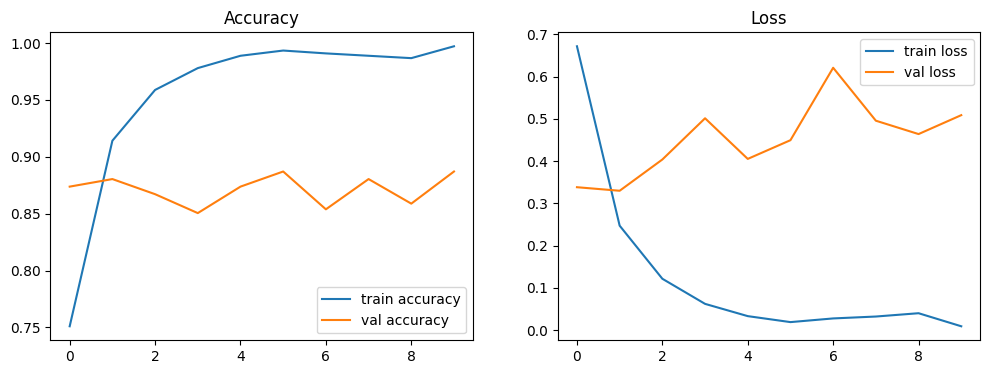

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step
Confusion Matrix:
 [[ 77   0   0   0   0  11]
 [  0  94   0   1   0   0]
 [  0   0  93   8  10   0]
 [  0   0  13  82  10   0]
 [  1   0   0   0 101   0]
 [ 12   0   0   1   1  87]]


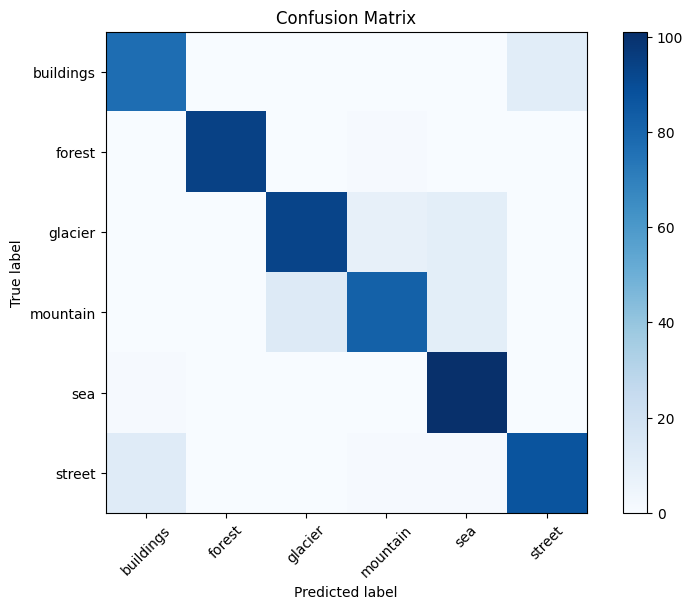

Classification Report:
               precision    recall  f1-score   support

   buildings       0.86      0.88      0.87        88
      forest       1.00      0.99      0.99        95
     glacier       0.88      0.84      0.86       111
    mountain       0.89      0.78      0.83       105
         sea       0.83      0.99      0.90       102
      street       0.89      0.86      0.87       101

    accuracy                           0.89       602
   macro avg       0.89      0.89      0.89       602
weighted avg       0.89      0.89      0.89       602



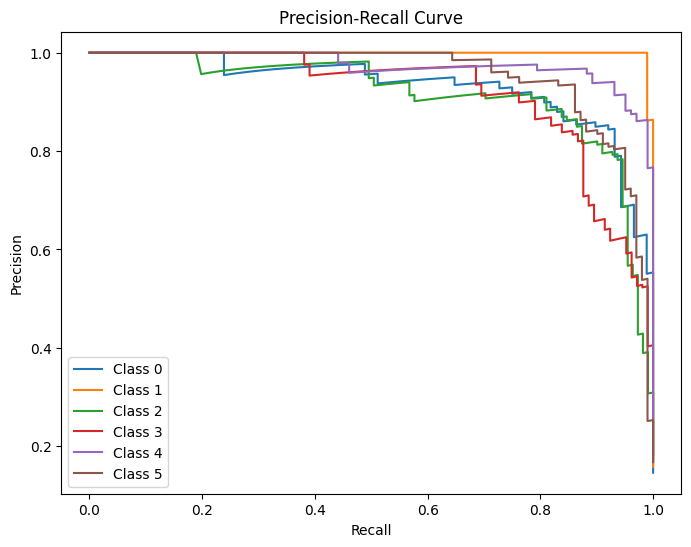

Training with block 4 unfrozen...
Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 39s 466ms/step - accuracy: 0.9912 - loss: 0.0274 - val_accuracy: 0.8405 - val_loss: 0.8539
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 410ms/step - accuracy: 0.9930 - loss: 0.0221 - val_accuracy: 0.8505 - val_loss: 0.7358
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 405ms/step - accuracy: 0.9970 - loss: 0.0239 - val_accuracy: 0.8754 - val_loss: 0.6495
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 407ms/step - accuracy: 0.9957 - loss: 0.0123 - val_accuracy: 0.8538 - val_loss: 0.7698
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 409ms/step - accuracy: 0.9990 - loss: 0.0030 - val_accuracy: 0.8937 - val_loss: 0.5513
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 410ms/step - accuracy: 1.0000 - loss: 1.3478e-04 - val_accuracy: 0.8920 - val_loss: 0.5622
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 410ms/step - accuracy: 1.0000 - loss: 4.0764e-05 - val_accuracy: 0.8920 - val_loss: 0.5717
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 409ms/step - 

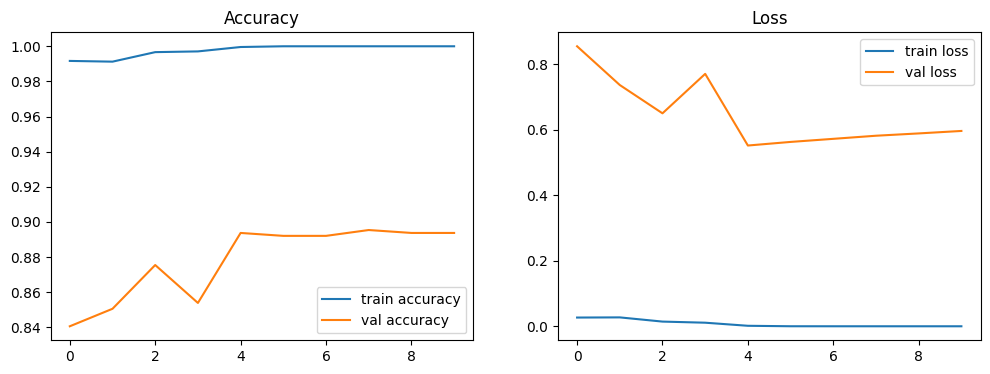

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step
Confusion Matrix:
 [[78  0  0  0  0 10]
 [ 0 94  0  1  0  0]
 [ 0  0 89 18  4  0]
 [ 0  0 10 93  2  0]
 [ 1  0  1  2 98  0]
 [13  0  0  2  0 86]]


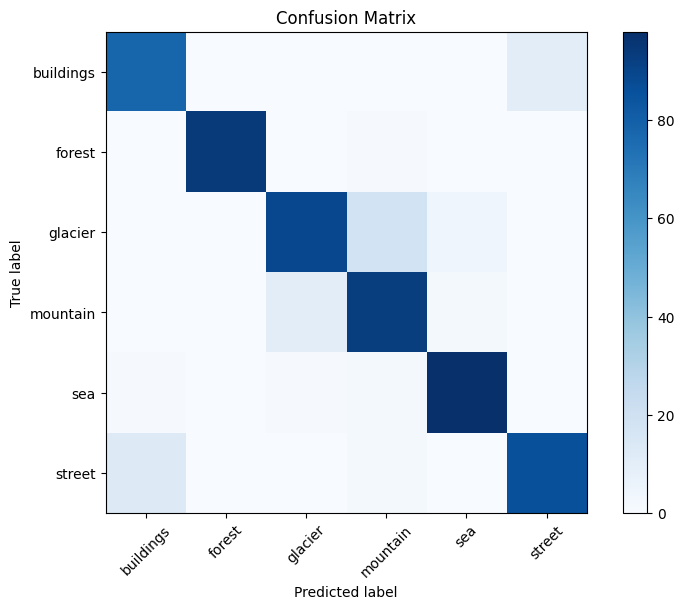

Classification Report:
               precision    recall  f1-score   support

   buildings       0.85      0.89      0.87        88
      forest       1.00      0.99      0.99        95
     glacier       0.89      0.80      0.84       111
    mountain       0.80      0.89      0.84       105
         sea       0.94      0.96      0.95       102
      street       0.90      0.85      0.87       101

    accuracy                           0.89       602
   macro avg       0.90      0.90      0.90       602
weighted avg       0.90      0.89      0.89       602



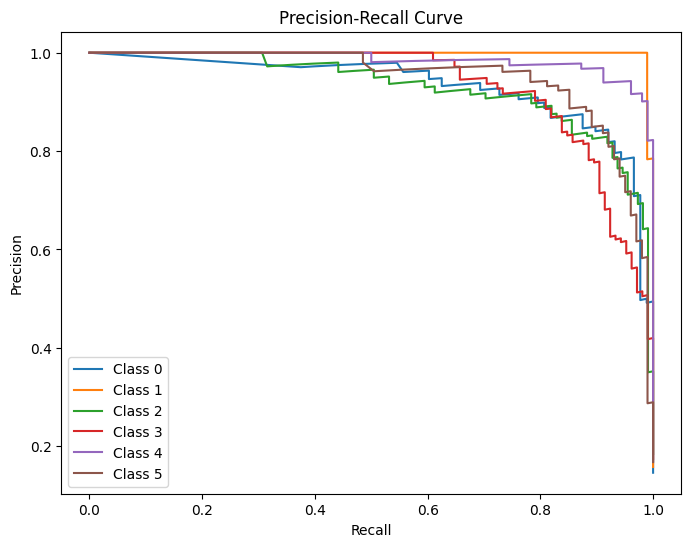

Training with block 3 unfrozen...
Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 37s 444ms/step - accuracy: 0.9980 - loss: 0.0063 - val_accuracy: 0.8821 - val_loss: 0.8332
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 406ms/step - accuracy: 0.9960 - loss: 0.0175 - val_accuracy: 0.8904 - val_loss: 0.7025
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 402ms/step - accuracy: 1.0000 - loss: 6.5481e-05 - val_accuracy: 0.8953 - val_loss: 0.6950
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 403ms/step - accuracy: 1.0000 - loss: 2.9591e-05 - val_accuracy: 0.8953 - val_loss: 0.6972
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 406ms/step - accuracy: 1.0000 - loss: 2.1792e-05 - val_accuracy: 0.8987 - val_loss: 0.6840
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 406ms/step - accuracy: 1.0000 - loss: 1.3756e-05 - val_accuracy: 0.8920 - val_loss: 0.6894
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 405ms/step - accuracy: 1.0000 - loss: 7.7828e-06 - val_accuracy: 0.8937 - val_loss: 0.6910
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 31s 4

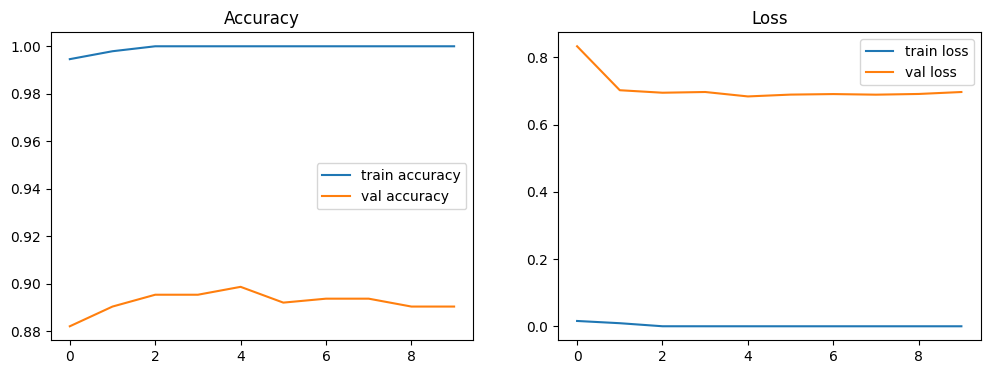

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step
Confusion Matrix:
 [[78  0  0  1  0  9]
 [ 0 94  0  1  0  0]
 [ 0  0 88 15  8  0]
 [ 0  0 12 88  5  0]
 [ 1  0  1  1 99  0]
 [10  0  0  2  0 89]]


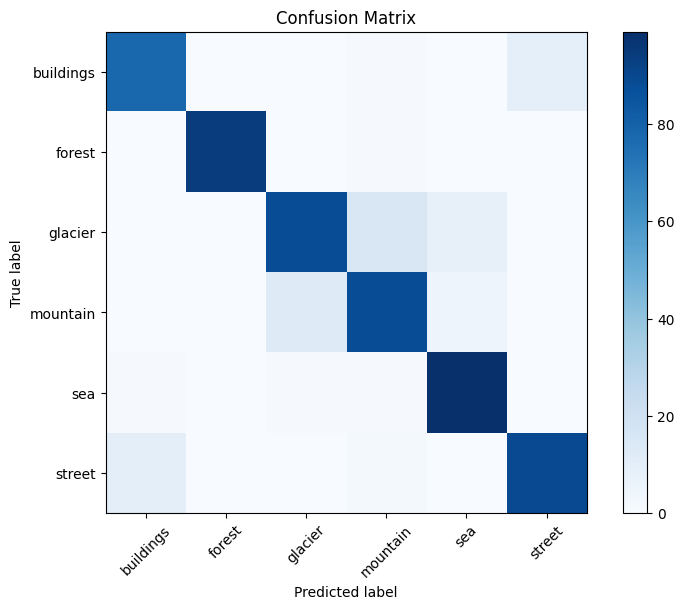

Classification Report:
               precision    recall  f1-score   support

   buildings       0.88      0.89      0.88        88
      forest       1.00      0.99      0.99        95
     glacier       0.87      0.79      0.83       111
    mountain       0.81      0.84      0.83       105
         sea       0.88      0.97      0.93       102
      street       0.91      0.88      0.89       101

    accuracy                           0.89       602
   macro avg       0.89      0.89      0.89       602
weighted avg       0.89      0.89      0.89       602



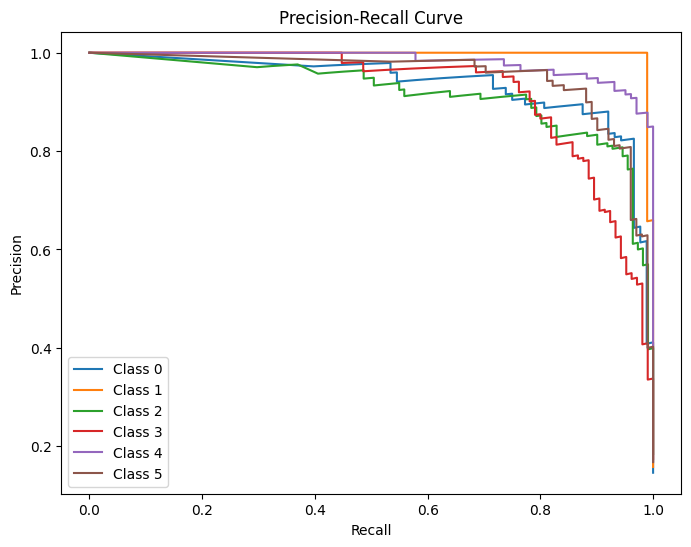

Training with block 2 unfrozen...
Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 34s 418ms/step - accuracy: 0.9997 - loss: 6.9650e-04 - val_accuracy: 0.8439 - val_loss: 1.0362
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 390ms/step - accuracy: 0.9954 - loss: 0.0099 - val_accuracy: 0.8804 - val_loss: 0.8343
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 385ms/step - accuracy: 0.9978 - loss: 0.0097 - val_accuracy: 0.8887 - val_loss: 0.8986
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 385ms/step - accuracy: 1.0000 - loss: 3.3682e-04 - val_accuracy: 0.8937 - val_loss: 0.8995
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 388ms/step - accuracy: 1.0000 - loss: 1.5122e-05 - val_accuracy: 0.8937 - val_loss: 0.8820
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 30s 389ms/step - accuracy: 1.0000 - loss: 5.0814e-06 - val_accuracy: 0.8937 - val_loss: 0.8788
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 29s 385ms/step - accuracy: 1.0000 - loss: 3.8547e-06 - val_accuracy: 0.8953 - val_loss: 0.8785
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 33s 4

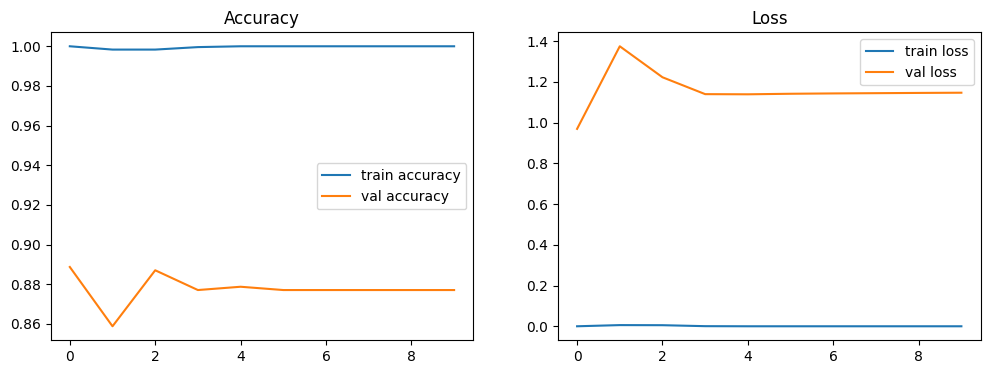

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step
Confusion Matrix:
 [[77  0  0  1  0 10]
 [ 0 94  0  1  0  0]
 [ 0  0 87 17  7  0]
 [ 0  0 17 85  3  0]
 [ 1  0  3  2 96  0]
 [10  0  0  2  0 89]]


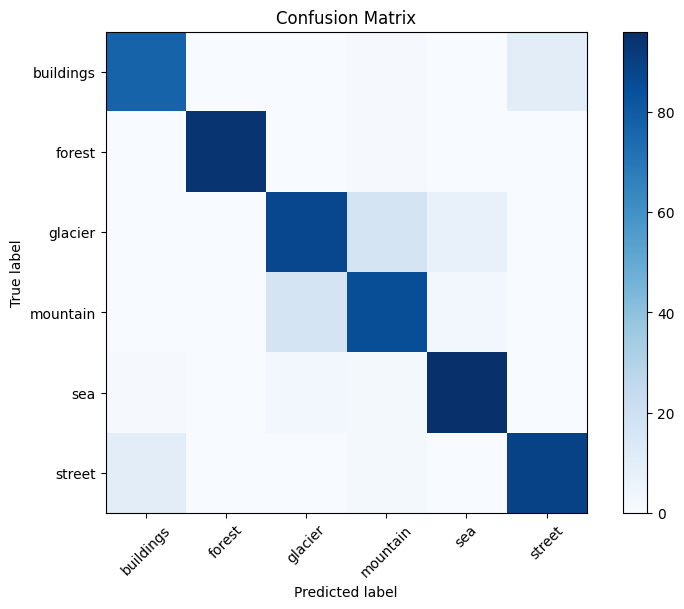

Classification Report:
               precision    recall  f1-score   support

   buildings       0.88      0.88      0.88        88
      forest       1.00      0.99      0.99        95
     glacier       0.81      0.78      0.80       111
    mountain       0.79      0.81      0.80       105
         sea       0.91      0.94      0.92       102
      street       0.90      0.88      0.89       101

    accuracy                           0.88       602
   macro avg       0.88      0.88      0.88       602
weighted avg       0.88      0.88      0.88       602



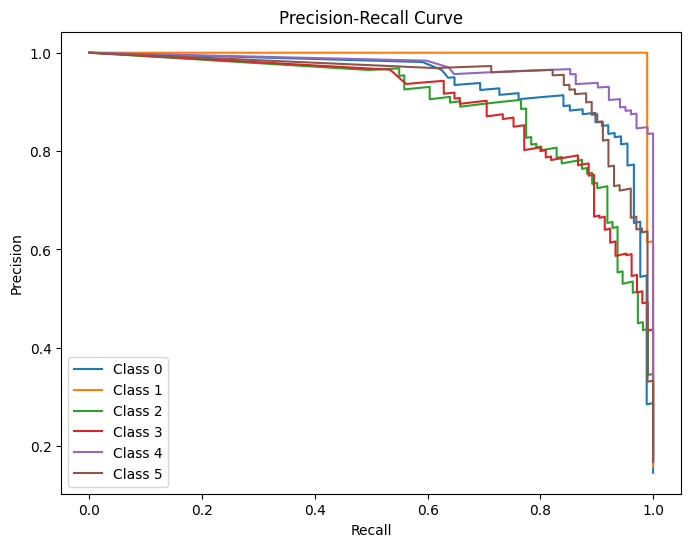

Model training and evaluation complete.


In [ ]:
# Run the test harness
run_test_harness()

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the model using VGG16
def define_model(num_classes):
    # Load the pre-trained VGG16 model without the top classifier layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Unfreeze layers from block 3 onwards (block 3 corresponds to layers after the 3rd convolutional block)
    for layer in base_model.layers[:15]:  # Freeze first 15 layers (blocks 1, 2)
        layer.trainable = False
    for layer in base_model.layers[15:]:  # Unfreeze the rest (block 3 and onwards)
        layer.trainable = True

    # Build the model
    model = Sequential()
    model.add(base_model)

    # Add custom classification head with Dropout for regularization
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))  # Add Dropout to reduce overfitting
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
def run_test_harness():
    # Prepare data generators
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)

    # Train and test directories
    train_dir = 'split_dataset/train'
    test_dir = 'split_dataset/test'

    # Prepare iterators for training and testing datasets
    train_it = datagen.flow_from_directory(
        train_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical',  # Multi-class classification
        shuffle=True
    )

    test_it = datagen.flow_from_directory(
        test_dir,
        batch_size=32,
        target_size=(224, 224),
        class_mode='categorical',
        shuffle=False
    )

    # Define the model
    num_classes = len(train_it.class_indices)  # Number of classes
    model = define_model(num_classes)  # Make sure this function is defined elsewhere

    # Train the model
    history = model.fit(
        train_it,
        validation_data=test_it,
        epochs=10
    )

    # Plot accuracy and loss curves
    plot_curves(history)

    # Evaluate model on test data
    test_steps = len(test_it)
    y_probs = model.predict(test_it, steps=test_steps, verbose=1)
    y_pred = np.argmax(y_probs, axis=1)
    y_true = test_it.classes

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:\n", cm)

    # Plot Confusion Matrix
    class_names = list(test_it.class_indices.keys())
    plot_confusion_matrix(cm, class_names)

    # Classification Report
    report = classification_report(y_true, y_pred, target_names=class_names)
    print("Classification Report:\n", report)

    # One-hot encode y_true
    y_true_one_hot = np.zeros((len(y_true), num_classes))
    y_true_one_hot[np.arange(len(y_true)), y_true] = 1

    # Precision-Recall Curves
    plot_pr_curve(y_true_one_hot, y_probs, num_classes)

    # Save Confusion Matrix to CSV
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
    cm_df.to_csv('confusion_matrix.csv', index=True)

    # Save classification report
    report_dict = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    report_df.to_csv('classification_report.csv', index=True)

    print("Confusion matrix and classification report saved to CSV.")


Found 2398 images belonging to 6 classes.
Found 602 images belonging to 6 classes.
Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 260ms/step - accuracy: 0.5352 - loss: 1.1930 - val_accuracy: 0.8571 - val_loss: 0.4010
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 230ms/step - accuracy: 0.8555 - loss: 0.3946 - val_accuracy: 0.8920 - val_loss: 0.3313
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 235ms/step - accuracy: 0.9151 - loss: 0.2561 - val_accuracy: 0.8688 - val_loss: 0.3225
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 222ms/step - accuracy: 0.9392 - loss: 0.1677 - val_accuracy: 0.8704 - val_loss: 0.4860
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 218ms/step - accuracy: 0.9521 - loss: 0.1538 - val_accuracy: 0.8904 - val_loss: 0.3643
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 219ms/step - accuracy: 0.9746 - loss: 0.0702 - val_accuracy: 0.8771 - val_loss: 0.5255
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 224ms/step - accuracy: 0.9664 - loss: 0.0945 - val_accuracy: 0.8754 - val_loss: 0.5463
Epoch 8/10
75/

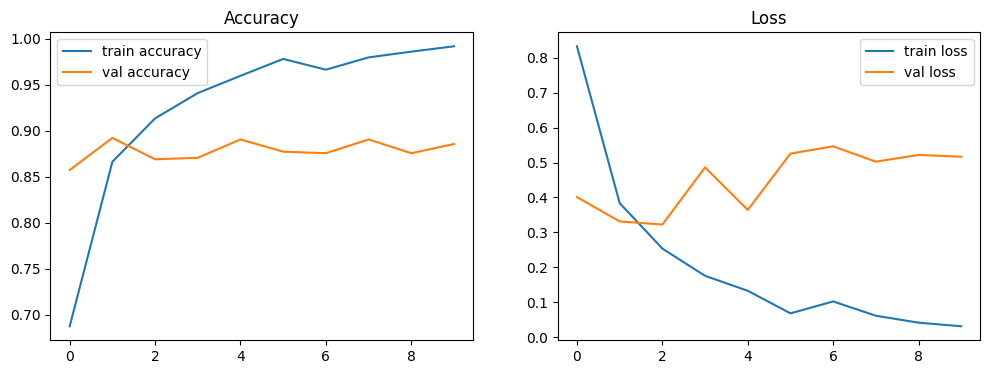

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step
Confusion Matrix:
 [[72  0  0  0  0 16]
 [ 0 93  0  2  0  0]
 [ 0  0 96 12  3  0]
 [ 0  0 15 89  1  0]
 [ 1  0  4  6 90  1]
 [ 6  0  0  1  1 93]]


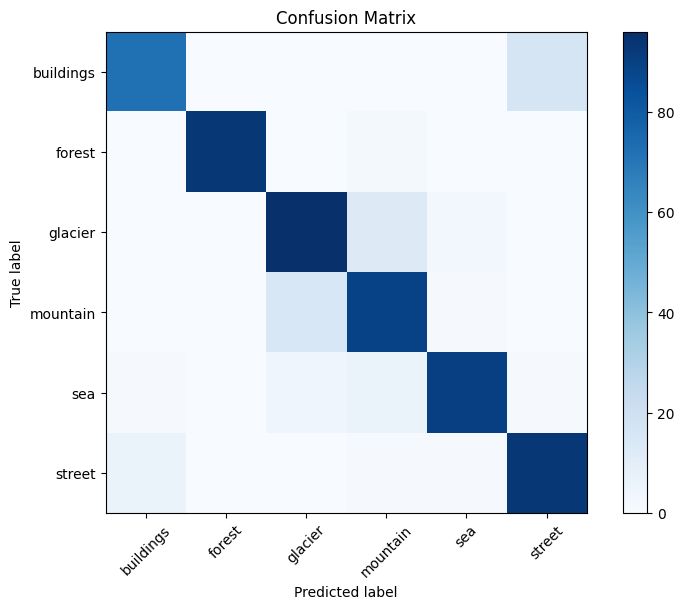

Classification Report:
               precision    recall  f1-score   support

   buildings       0.91      0.82      0.86        88
      forest       1.00      0.98      0.99        95
     glacier       0.83      0.86      0.85       111
    mountain       0.81      0.85      0.83       105
         sea       0.95      0.88      0.91       102
      street       0.85      0.92      0.88       101

    accuracy                           0.89       602
   macro avg       0.89      0.89      0.89       602
weighted avg       0.89      0.89      0.89       602



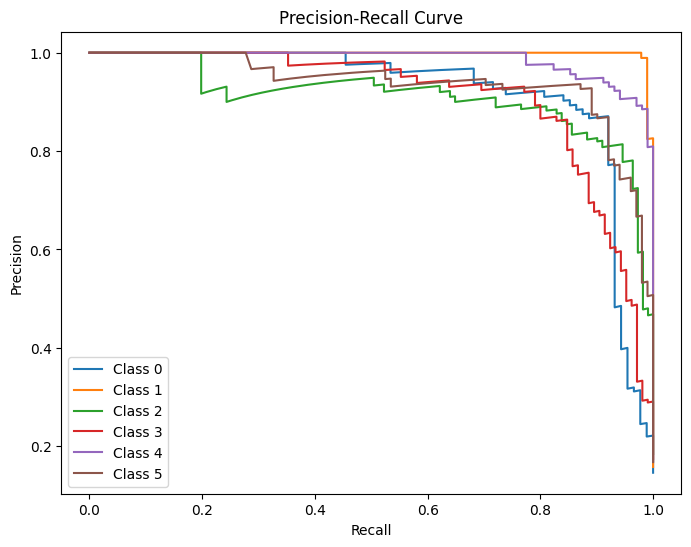

Confusion matrix and classification report saved to CSV.


In [ ]:
run_test_harness()